In [2]:
# run this cell twice

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

%matplotlib notebook

In [3]:
N_PARTIC = 65536
folder = "Barnes_Hut_CUDA/"

In [4]:
f= open(folder+"trajectories.txt","r")

In [5]:
x_pos = []
y_pos = []
for idx,line in enumerate(f):
    try:
        fields = line.split(" ")
        y_pos.append(float(fields[1]))
        x_pos.append(float(fields[0]))
    except:
        print("don't really know what's happening with this file.")

<IPython.core.display.Javascript object>


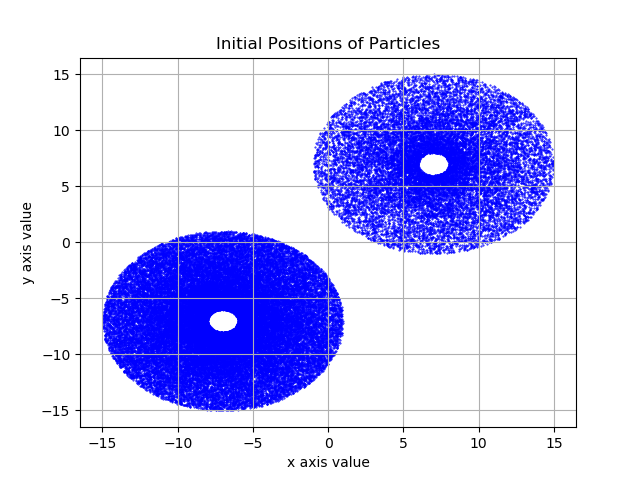

In [6]:
plt.figure(0)
plt.scatter(x_pos[0:N_PARTIC], y_pos[0:N_PARTIC], c='b', s=0.2)
    
plt.title("Initial Positions of Particles")
plt.xlabel("x axis value")
plt.ylabel("y axis value")
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


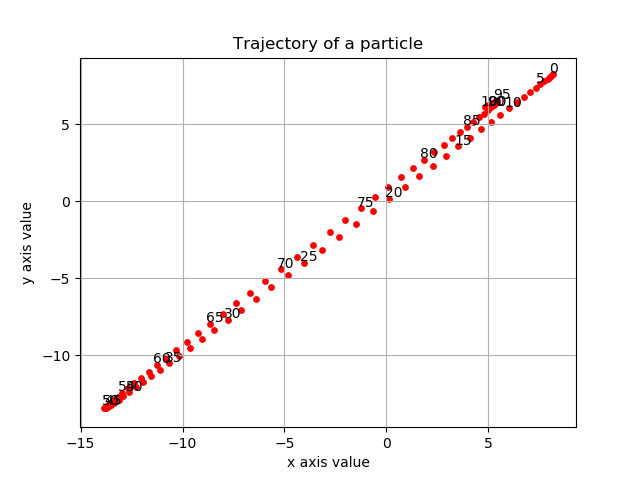

In [7]:
plt.figure(1)
num = 1000

assert len(x_pos) == len(y_pos)

for idx,i in enumerate(range(0,len(x_pos), N_PARTIC)):
    plt.scatter(x_pos[i+num], y_pos[i+num], s=15, c='r')
    if idx%5 == 0:
        plt.annotate(str(idx), (x_pos[i+num]-0.2, y_pos[i+num]+0.1))


plt.title("Trajectory of a particle")
plt.xlabel("x axis value")
plt.ylabel("y axis value")
plt.grid(True)
plt.show()

In [8]:
def animate(i):
    x = x_pos[(i*N_PARTIC):(i+1)*N_PARTIC]
    y = y_pos[(i*N_PARTIC):(i+1)*N_PARTIC]
    data = np.hstack((np.reshape(x, (-1,1)),np.reshape(y, (-1,1))))
    scat.set_offsets(data)
    return line,

<IPython.core.display.Javascript object>


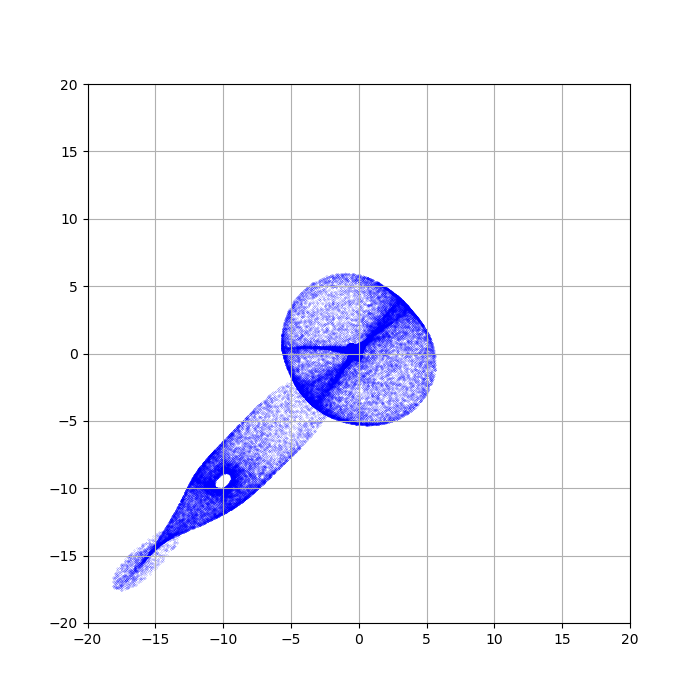

In [9]:
fig = plt.figure(figsize=(7,7))

ax = plt.axes(xlim=(-20,20),ylim=(-20,20))
scat = ax.scatter(x_pos[0:N_PARTIC], y_pos[0:N_PARTIC], c='b', s=0.01)
ax.grid(True)

anim = animation.FuncAnimation(fig, animate, frames=99, interval=100)
anim.save(folder+'animation_2blobs.mp4')